In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
filename = '../Complete_errors_stored10_size10_spars0.1_epochs500_eta0.001_ALL.npz'
data = np.load(filename)
print(data.keys())

['FL_SCL', 'FIH_N', 'FI_N', 'FLT_N', 'FL_N', 'trad_80_N']


In [67]:
def plot_stuff_together(what, label):
    # plt.subplot(1, 2, axisn)
    center = np.median(what, axis=0)
    edges = np.percentile(what, [25, 75], axis=0)
    plt.gca().color_cyle(plt.cm.viridis(np.arange(what.shape[-1])/what.shape[-1]))
    l = plt.plot(center, label=label, linewidth=2.5, cmap=plt.cm.viridis)
    c = l[0].get_color()
    # plt.fill_between(np.arange(len(center)), *edges, alpha=.15, color=c)
    # plt.plot(edges.T, color=c, alpha=.2)
    plt.ylabel('Pixel Error %')
    plt.ylim([0, 1.1])
    plt.legend(loc='lower right')
    # plt.xlim([-1, 2000])

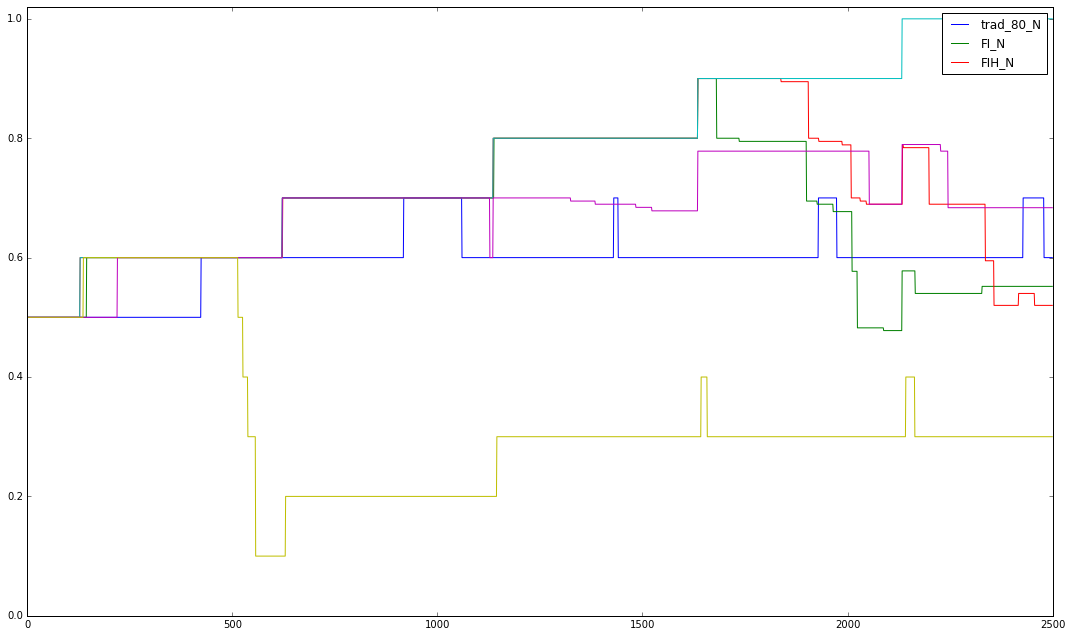

In [68]:
plt.figure(figsize=(15, len(data.keys())*1.5))
for j, k in enumerate(data.keys()):
    center = np.median(data[k], axis=0)
    n = center.shape[-1]
    #plt.plot(np.median(data[k].mean(-1), axis=0))
    mean_over_p = np.mean(data[k],axis = 2)
    mean_over_trials = np.mean(mean_over_p,axis = 0)
    plt.plot(mean_over_trials)
    edges = np.percentile(data[k].mean(-1), [25, 75], axis=0)
plt.tight_layout()
plt.ylim((0,1.02))
#plt.legend(['FI_N', 'SCL_N', 'trad_80_N', 'FL_N'])
plt.legend(['trad_80_N', 'FI_N', 'FIH_N'])
#plt.legend(['FI_N', 'trad_80_N', 'FL_N'])

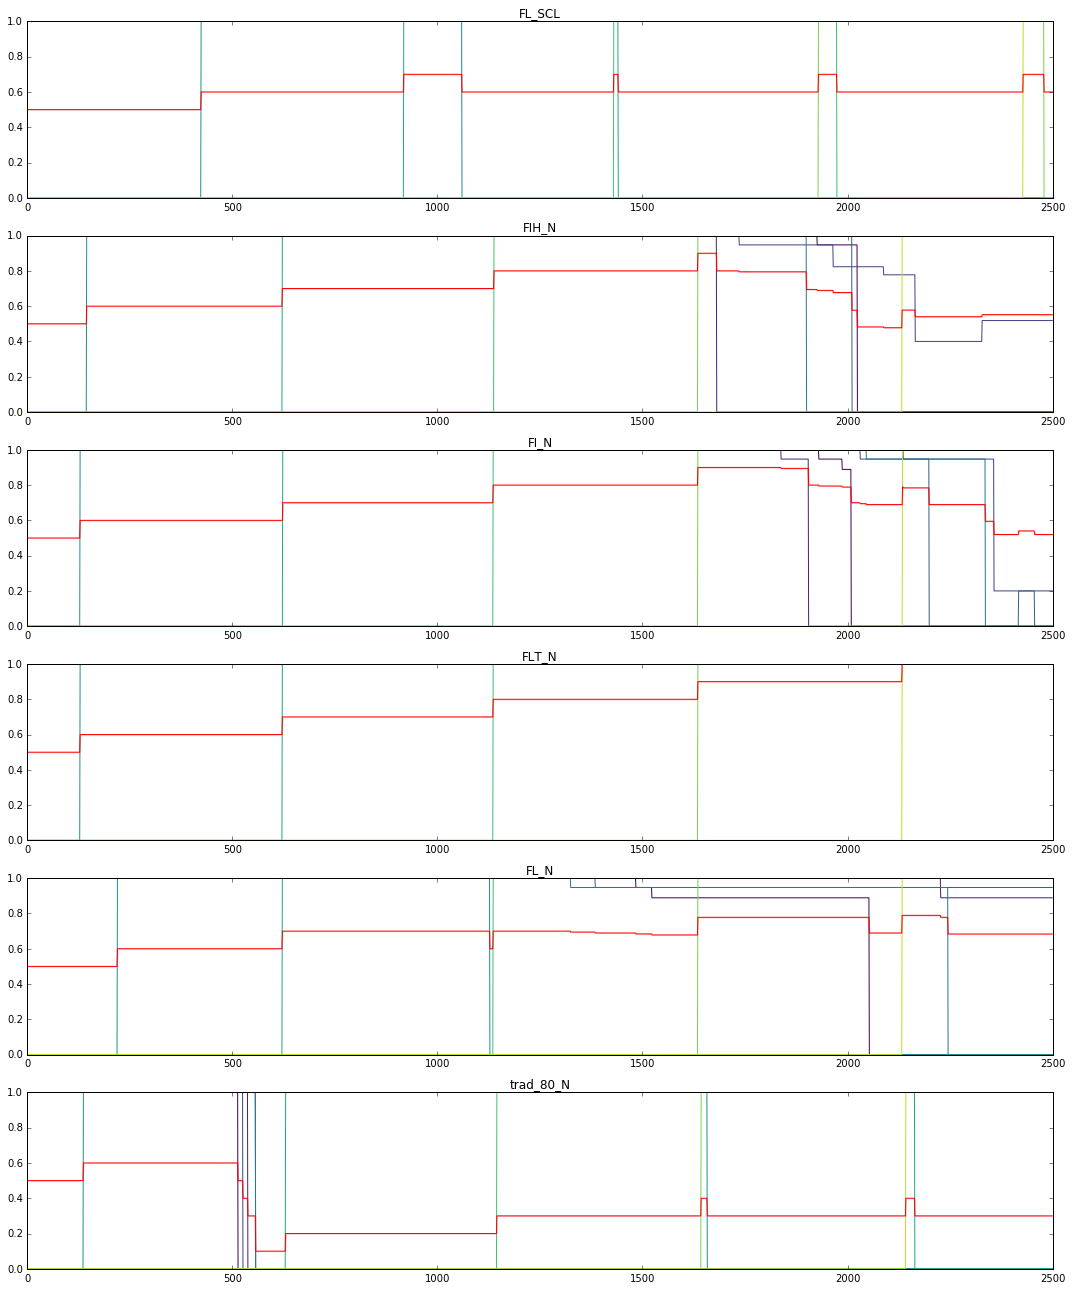

In [69]:
plt.figure(figsize=(15, len(data.keys())*3))
for j, k in enumerate(data.keys()):
    plt.subplot(len(data.keys()), 1, j+1)
    plt.title(k)
    center = np.median(data[k], axis=0)
    n = center.shape[-1]
    for i, p in enumerate(center.T):
        plt.plot(p, c=plt.cm.viridis(i/n))
    plt.plot(np.median(data[k].mean(-1), axis=0), c='r')
    edges = np.percentile(data[k].mean(-1), [25, 75], axis=0)
    plt.fill_between(np.arange(len(center)), *edges, alpha=.15, color='r')
plt.tight_layout()

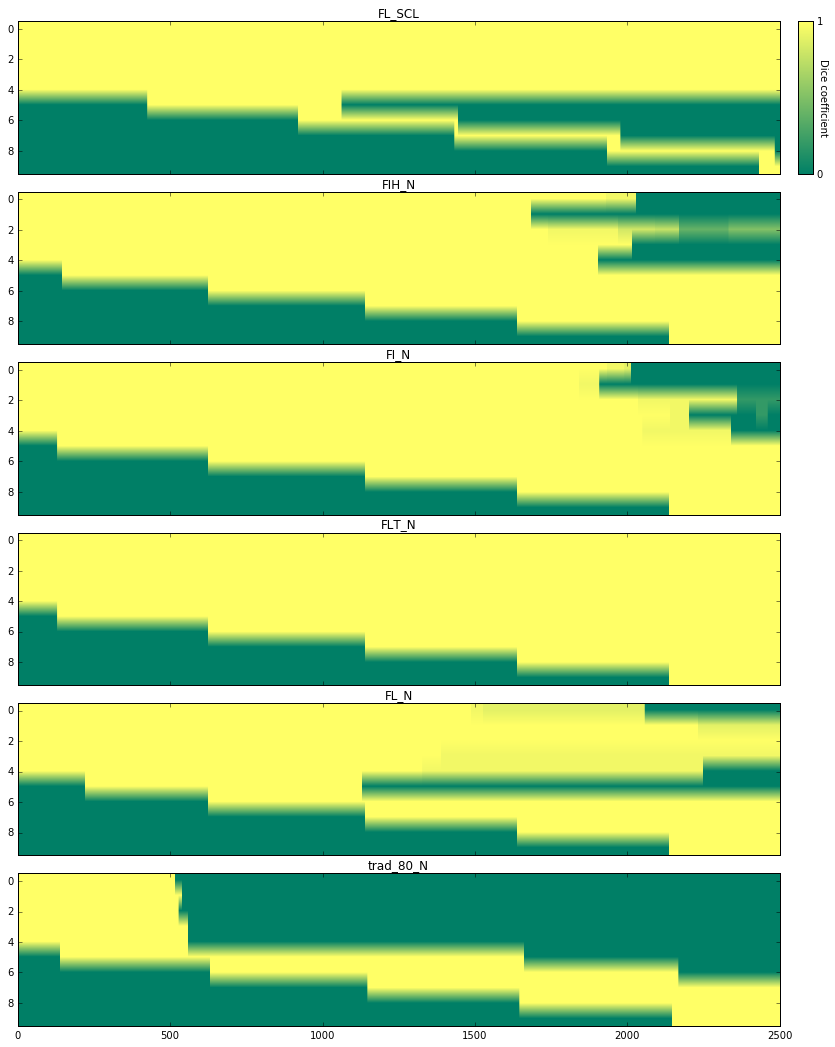

In [70]:
from mpl_toolkits.axes_grid1 import ImageGrid

# Set up figure and image grid
fig = plt.figure(figsize=(15, len(data.keys())*3))

ax = ImageGrid(fig, 111,
                 nrows_ncols=(len(data.keys()), 1),
                 axes_pad=0.25,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="each",
                 cbar_size="2%",
                 cbar_pad=0.25,
                 )

for j, k in enumerate(data.keys()):
    ax[j].set_title(k)
    center = np.median(data[k], axis=0)
    n,m = center.shape
    # blank out lower triangle:
#     inds = [[(x,y) for x in range(n) if x<n/m*y] for y in range(m)]
#     for i in inds:
#         for j in i:
#             center[j]=0
    im = ax[j].imshow(center.T,cmap=plt.cm.summer,aspect=0.2*n/m,vmin=0,vmax=1)
    ax[j].cax.set_visible(False)

    
ax[0].cax.set_visible(True)
ax[0].cax.colorbar(im)
ax[0].cax.toggle_label(True)
ax[0].cax.set_yticks((0,1))
ax[0].cax.set_ylabel('Dice coefficient', rotation=270)